In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [44]:
# for size in $(seq 500 500 6000) 10 100 200 300 400 600 700 800 900 ./ 6315; do

time_sample_sizes = [10] + list(range(100,1000,100)) + list(range(1000,6100,1000)) + [6315]

fpath = "../data/OUTPUT/mcm/sample_sizes_fromfull/{}/Fitting_times/Fitting_time_.txt"

times = []
for i, sample_size in enumerate(time_sample_sizes):
    times.append(np.loadtxt(fpath.format(sample_size)))

times = np.array(times)/10 # fitting 10 models
times.shape

(17, 50)

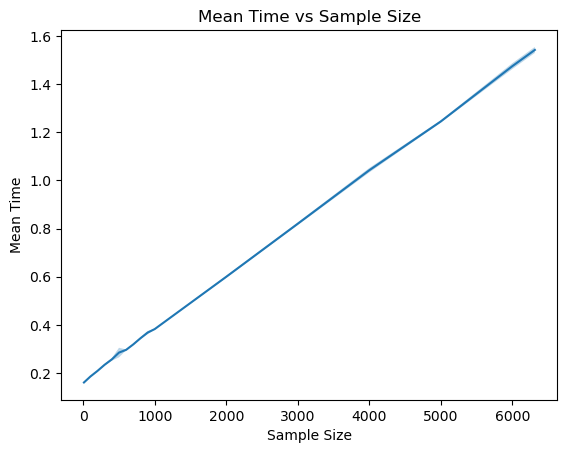

In [45]:
mean_times = np.mean(times, axis=1)
ci = stats.t.interval(0.95, len(times[0])-1, loc=mean_times, scale=stats.sem(times, axis=1))
plt.fill_between(time_sample_sizes, ci[0], ci[1], alpha=0.3)
plt.plot(time_sample_sizes, mean_times)
plt.xlabel('Sample Size')
plt.ylabel('Mean Time')


plt.title('Mean Time vs Sample Size')
plt.show()

array([0.01607404, 0.00185444, 0.00104464, 0.00078176, 0.0006416 ,
       0.00056986, 0.00049386, 0.0004557 , 0.00043049, 0.00040867,
       0.00038261, 0.00029989, 0.00027339, 0.00026059, 0.000249  ,
       0.00024578, 0.00024421])

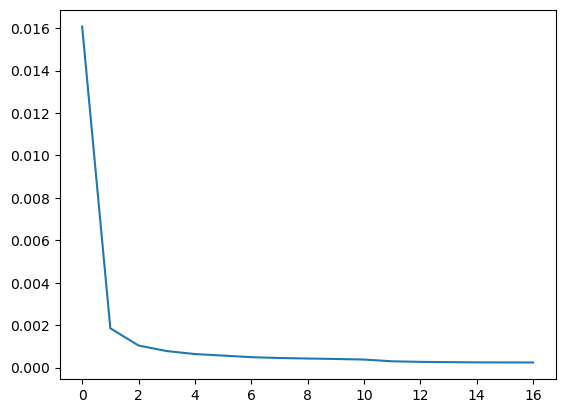

In [55]:
# 0.00024421 seconds per sample independent of sample size
plt.plot(mean_times/time_sample_sizes)
mean_times/time_sample_sizes